In [1]:
import nltk
from nltk import *
from nltk.tag import AffixTagger 
from nltk.tag import tnt 
from nltk.tag import DefaultTagger 

s_tagged = nltk.corpus.cess_esp.tagged_sents()

f_list = []
t_list = []
for sent in s_tagged:
    for word, tag in sent:
        f_list.append((word, tag))
    t_list.append(f_list)
    f_list = []
    
cut = int(0.9 * len(s_tagged))
training_data = s_tagged[:cut]
test_data = s_tagged[cut:]
text == training_data + test_data                      #True
print(len(training_data) / len(test_data))

9.0


In [2]:
portion = int(0.1 * len(t_list))

train1K = t_list[:portion]
train2K = t_list[portion:portion*2]
train3K = t_list[portion*2:portion*3]
train4K = t_list[portion*3:portion*4]
train5K = t_list[portion*4:portion*5]
train6K = t_list[portion*5:portion*6]
train7K = t_list[portion*6:portion*7]
train8K = t_list[portion*7:portion*8]
train9K = t_list[portion*8:portion*9]
train10K = t_list[portion*9:portion*10]

complete = train1K + train2K + train3K + train4K + train5K + train6K + train7K + train8K + train9K + train10K

In [7]:
from random import shuffle

shuffle(complete)

train_list = []
test_list = []
sufix_accuracy = []

# You can change affix_length to determine how many letters count

def AffixT(training_data, test_data):
    sufix_tag = AffixTagger(training_data, affix_length = -1) 
    return sufix_tag.evaluate(test_data) 
    
for flag in range(10):
    for i in range(10):
        if i == flag:
            test_list = complete[portion*(i):portion*(i+1)]
        else:
            train_list.append(complete[portion*(i):portion*(i+1)])
    train_list = train_list[0] + train_list[1] + train_list[2] + train_list[3] + train_list[4] + train_list[5] + train_list[6] + train_list[7] + train_list[8]
    sufix_accuracy.append(AffixT(train_list, test_list))
    train_list.clear()
    test_list.clear()

In [4]:
# Best result

print("Suffix accuracy - last 3 letters \n")
for i in sufix_accuracy:
    print(i)

Suffix accuracy - last 3 letters 

0.2746946082561078
0.27247701656884643
0.27590072057646114
0.26743827160493827
0.2749028749028749
0.2751296616448506
0.278451825418611
0.2759783386124451
0.27151051625239003
0.2779934613812832


In [6]:
print("Suffix accuracy - last 2 letters \n")
for i in sufix_accuracy:
    print(i)

Suffix accuracy - last 2 letters 

0.25222720016478706
0.25150958256760303
0.25015657620041754
0.25093413045799084
0.2600990099009901
0.2488089204257476
0.2530259050331343
0.24554341575618172
0.2517132993249858
0.2587869203693312


In [8]:
# Worst result

print("Suffix accuracy - last 1 letters \n")
for i in sufix_accuracy:
    print(i)

Suffix accuracy - last 1 letters 

0.21731639026491492
0.22146779830254618
0.22416812609457093
0.22410379324718632
0.21925048892647603
0.22500380845985885
0.223704076497232
0.2219998973885383
0.22529896359287802
0.22745444161777686


In [27]:
# Best results we get when we use sufix [-3] which is, around 0.27
# So that I am going to use that parameter for TnT tagger

s_tagged = nltk.corpus.cess_esp.tagged_sents()

fTnT_list = []
tTnT_list = []
for sent in s_tagged:
    for word, tag in sent:
        fTnT_list.append((word, tag))
    tTnT_list.append(fTnT_list)
    fTnT_list = []

In [28]:
portion = int(0.1 * len(tTnT_list))

train1K = t_list[:portion]
train2K = t_list[portion:portion*2]
train3K = t_list[portion*2:portion*3]
train4K = t_list[portion*3:portion*4]
train5K = t_list[portion*4:portion*5]
train6K = t_list[portion*5:portion*6]
train7K = t_list[portion*6:portion*7]
train8K = t_list[portion*7:portion*8]
train9K = t_list[portion*8:portion*9]
train10K = t_list[portion*9:portion*10]

complete_Tnt = train1K + train2K + train3K + train4K + train5K + train6K + train7K + train8K + train9K + train10K

from random import shuffle

shuffle(complete_Tnt)

train_list = []
test_list = []
allof = []

def TnTtagger(training_data, test_data):
    # initializing tagger 
    tnt_tagging = tnt.TnT(unk = sufix_tag, Trained = True) 
    # training  
    tnt_tagging.train(training_data) 
    # evaluating 
    return tnt_tagging.evaluate(test_data) 
    
for flag in range(10):
    for i in range(10):
        if i == flag:
            test_list = complete_Tnt[portion*(i):portion*(i+1)]
        else:
            train_list.append(complete_Tnt[portion*(i):portion*(i+1)])
    train_list = train_list[0] + train_list[1] + train_list[2] + train_list[3] + train_list[4] + train_list[5] + train_list[6] + train_list[7] + train_list[8]
    allof.append(TnTtagger(train_list, test_list))
    train_list.clear()
    test_list.clear()

In [29]:
print("Complete dataset accuracy\n")
for i in allof:
    print(i)

Complete dataset accuracy

0.9376175707966852
0.9386066690208343
0.9417470637583892
0.939386149812349
0.9379813331973275
0.9380873997769872
0.940690300447032
0.9405924739791833
0.9401790416008425
0.9397965538717044


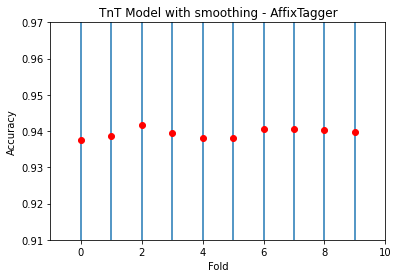

In [32]:
# Tnt Model for complete data set
import matplotlib.pyplot as plt
x=[i for i in range(10)]
y=allof
plt.axis([-1, 10, 0.91, 0.97])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('TnT Model with smoothing - AffixTagger')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=allof,linestyle='None')
plt.show()